Question 3:

In [379]:
import pandas as pd 
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr,f_oneway
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy import stats 
import plotly.express as px

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_13124\1104106287.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr,f_oneway
C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_13124\1104106287.py:6: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr,f_oneway


In [142]:
df = pd.read_csv(r"C:\Users\HP-LAPTOP\Downloads\data (1).csv")
df.drop('Patient ID',inplace= True,axis = 1)
df.head(2)

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,130,120
1,142,135


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: ylabel='Density'>

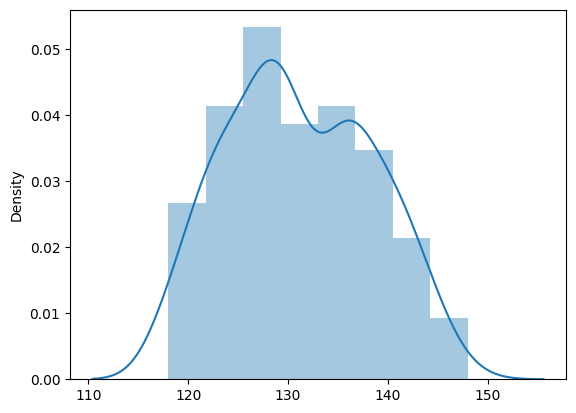

In [202]:
sns.distplot(df)

# appox normally distributed 

In [144]:
# . Measure the dispersion in both and interpret the results

before_mean = df[' Blood Pressure Before (mmHg)'].mean()
after_mean = df[' Blood Pressure After (mmHg)'].mean()

# upper and lower boundries

for j in df.columns:
    for i in range(1,4):
        up_1 = df[j].mean()+df.std()[1]*(i)
        print(f'{j} up_{i}:',up_1)
        lb_1 = df[j].mean()-df.std()[1]*(i)
        print(f'{j} lb_{i}:',lb_1)
        print (len(df[(df[j] < up_1 )& (df[j] > lb_1 )]))


 Blood Pressure Before (mmHg) up_1: 140.79802210252322
 Blood Pressure Before (mmHg) lb_1: 127.02197789747677
62
 Blood Pressure Before (mmHg) up_2: 147.68604420504644
 Blood Pressure Before (mmHg) lb_2: 120.13395579495354
98
 Blood Pressure Before (mmHg) up_3: 154.5740663075697
 Blood Pressure Before (mmHg) lb_3: 113.24593369243031
100
 Blood Pressure After (mmHg) up_1: 135.24802210252324
 Blood Pressure After (mmHg) lb_1: 121.47197789747679
60
 Blood Pressure After (mmHg) up_2: 142.13604420504646
 Blood Pressure After (mmHg) lb_2: 114.58395579495355
100
 Blood Pressure After (mmHg) up_3: 149.02406630756968
 Blood Pressure After (mmHg) lb_3: 107.69593369243033
100


Interpretation from the given dataset:

1) Blood Pressure Before:
* mean = 133.91
* 1 std = 6.59  (datas were 133.91 plus or minus 6.59 away from the mean)
* 2 std = 13.18 (datas were 133.91 plus or minus 13.18 away from the mean)
* 3 std = 19.77 (datas were 133.91 plus or minus 19.77 away from the mean)

2) Blood Pressure After:
* mean = 128.36
* 1 std = 6.59  (datas were 133.91 plus or minus 6.88 away from the mean)
* 2 std = 13.18 (datas were 133.91 plus or minus 13.77 away from the mean)
* 3 std = 19.77 (datas were 133.91 plus or minus 20.66 away from the mean)

In [181]:
# Calculate mean and 5% confidence interval and plot it in a graph

mean = df.mean()

std_error = st.sem(df)

# calculating confidence interval

c_i = st.norm.interval(confidence = 0.95,loc = mean,scale = std_error)

In [182]:
confidence_interval = [c_i[0][0],c_i[1][0]],[c_i[0][1],c_i[1][1]]

In [183]:
confidence_interval

([132.61676127359584, 135.20323872640415],
 [127.00997247543387, 129.71002752456616])

([<matplotlib.axis.XTick at 0x2295e8aa0d0>,
 [Text(1, 0, 'Blood Pressure Before'), Text(2, 0, 'Blood Pressure After')])

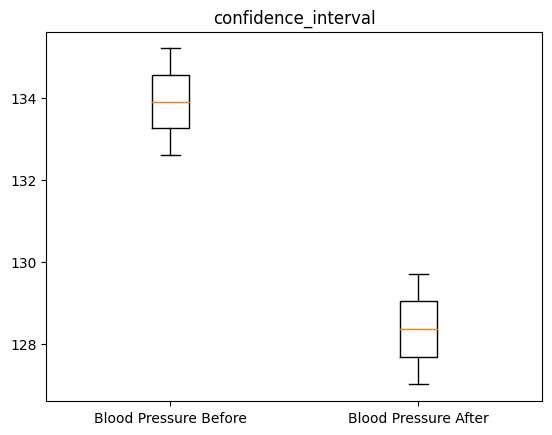

In [184]:
plt.boxplot(confidence_interval)
plt.title('confidence_interval')
plt.xticks([1,2],['Blood Pressure Before','Blood Pressure After'])

In [197]:
# Calculate the Mean absolute deviation and Standard deviation and interpret the results.

mean_abs = df.mad()
std = df.std()
print(f'Mean absolute deviation: {mean_abs}')
print(f'Standard deviation: {std}')

Mean absolute deviation:  Blood Pressure Before (mmHg)    5.7118
 Blood Pressure After (mmHg)     5.9000
dtype: float64
Standard deviation:  Blood Pressure Before (mmHg)    6.598278
 Blood Pressure After (mmHg)     6.888022
dtype: float64


Blood Pressure Before :

* On average the values are 5.7118 units away from the mean (133.91)
* Mean absolute deviation and Standard deviation Values are low which indicates the most of the data is clustered around the mean.

Blood Pressure After:

* On average the values are 5.9 units away from the mean (128.36)
* Mean absolute deviation and Standard deviation Values are low which indicates the most of the data is clustered around the mean.

In [240]:
# Calculate the correlation coefficient and check the significance of it at 1% level of significance.

corr = np.corrcoef(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
print(corr)

p_value = pearsonr(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
print(f'p_value:{p_value[1]}')

[[1.        0.9779486]
 [0.9779486 1.       ]]
p_value:1.8097381433072956e-68


A correlation of 0.977 indicates a strong positive linear relationship between these variables and the corresponding p-value is less than .01, we conclude that there is a statistically significant association between the two variables.

Question 4:

In [35]:
total_samples = 20
perfect_square = 4  # 1,4,9,16
probablity = 4/20  # 1/5

print(f'The probability that the number on the slip of paper is a perfect square is {probablity}')

The probability that the number on the slip of paper is a perfect square is 0.2


Question 5:

In [21]:
total_sample_cars = 10
A_cars = 8
B_cars = 2

probablity_A = 8/10

print(f'the probability that it belongs to Company A {probablity_A}')

the probability that it belongs to Company A 0.8


Question 9:

In [297]:
scores = {'karan':[85,90,92],'deepa': [70,80,85] ,'karthik':[90,85,88], 'chandan':[75,70,75], 'jeevan':[95,92,96]}

null_hypo = 'The mean scores of all the students are the same.'
alternate_hypo = 'The mean scores of all the students are not the same.'
thershold = 0.005

annova = f_oneway(scores['karan'],scores['deepa'],scores['karthik'],scores['chandan'],scores['jeevan'])
p_value = annova[1]
print('p_value:',round(p_value,9))

if p_value < thershold:
    print('Since P_value is lesser than thershold, we reject the null hypothesis.')
    print(alternate_hypo)
    
    for i in scores:
        scores[i] = np.average(scores[i])

    for i in scores:
        if scores[i] == max(scores.values()):
            print(f'{i} is the student with the highest score.')
    
    
else:
    print('Since P_value is greater than thershold, we accept the null hypothesis.')
    print(null_hypo)

p_value: 0.000776092
Since P_value is lesser than thershold, we reject the null hypothesis.
The mean scores of all the students are not the same.
jeevan is the student with the highest score.


Question 6: 

In [300]:
df = pd.read_csv(r"C:\Users\HP-LAPTOP\Downloads\data (1).csv")
df.drop('Patient ID',inplace= True,axis = 1)
df.head()

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,130,120
1,142,135
2,120,118
3,135,127
4,148,140


In [301]:
df['Change in blood pressure'] = df[' Blood Pressure Before (mmHg)'] - df[' Blood Pressure After (mmHg)']

In [303]:
df.head()

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg),Change in blood pressure
0,130,120,10
1,142,135,7
2,120,118,2
3,135,127,8
4,148,140,8


(array([ 1.,  5., 20., 22.,  0., 26., 19.,  5.,  1.,  1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

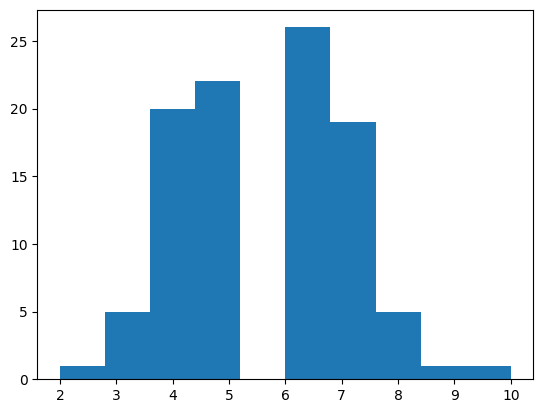

In [311]:
plt.hist(df['Change in blood pressure'])

# doesn't look normally distributed

In [323]:
# mean and std

print('mean=%.3f stdv=%.3f' % (np.mean(df['Change in blood pressure']), np.std(df['Change in blood pressure'])))

mean=5.550 stdv=1.438


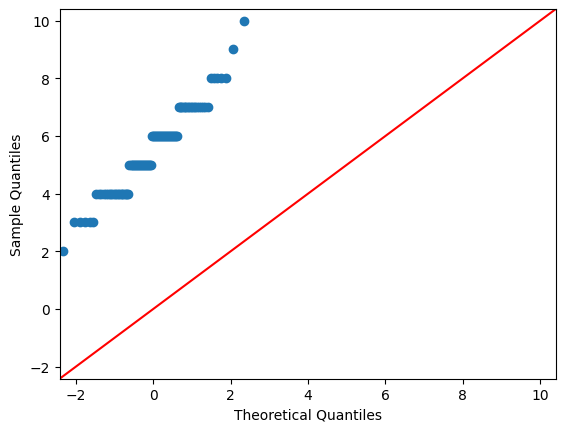

In [331]:
# q-q plot 

sm.qqplot(df['Change in blood pressure'],line = '45')
plt.show()

In [324]:
# Shapiro-Wilk Test

thershold = 0.05
stat, p = shapiro(df['Change in blood pressure'])

if p < thershold:
    print(f'{round(p,6)} lesser than {thershold} : Data does not follow Gaussian Distribution')
else:
    print(f'{round(p,6)} lesser than {thershold} :Data follows Gaussian Distribution')

0.001494 lesser than 0.05 : Data does not follow Gaussian Distribution


Observation: The change in blood pressure does not follows a normal distribution.

Question 8:

In [332]:
data = {'before_theropy': [10,8,12,15,6,9,11,7,14,10], 'after_theropy': [7,6,10,12,5,8,9,6,12,8], 
        'difference': [-3,-2,-2,-3,-1,-1,-2,-1,-2,-2]}

In [336]:
df = pd.DataFrame(data)
df.head(2)

,before_theropy,after_theropy,difference
0,10,7,-3
1,8,6,-2


In [361]:
ststs,p_value = stats.wilcoxon(df['before_theropy'],df['after_theropy'])
thershold = 0.05 

if p_value < thershold:
    print('The therapy had a significant effect on anxiety levels')
else:
    print('The therapy doesnt have a significant effect on anxiety levels')

The therapy had a significant effect on anxiety levels


Question 11:

In [365]:
df = pd.read_csv(r"C:\Users\HP-LAPTOP\Downloads\data (1).csv")
df.drop('Patient ID',inplace= True,axis = 1)
df.head(2)

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,130,120
1,142,135


<Axes: xlabel=' Blood Pressure After (mmHg)'>

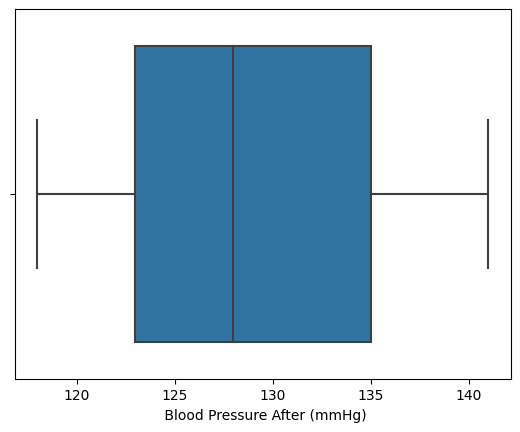

In [375]:
sns.boxplot(df[' Blood Pressure After (mmHg)'])

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel=' Blood Pressure Before (mmHg)'>

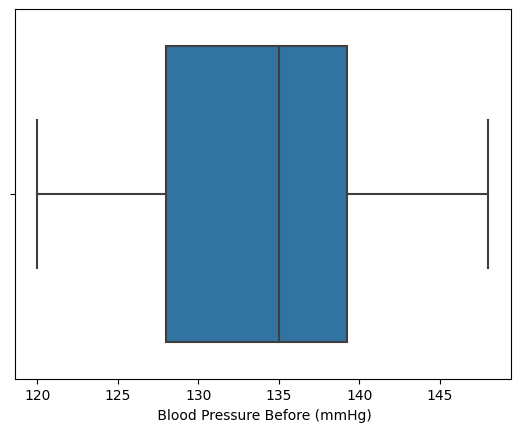

In [376]:
sns.boxplot(df[' Blood Pressure Before (mmHg)'])

Question 11:

In [390]:
# Check whether the distribution of all the classes are the same or not.

stat,p_value = stats.ks_2samp(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
thershold = 0.05 

null = 'The distribution of all the classes are the same'
alternate = 'The distribution of all the classes are not same'

if p_value < thershold:
    print(alternate)
else:
    print(null)

The distribution of all the classes are not same


In [382]:
fig = px.ecdf(df, x=[' Blood Pressure Before (mmHg)', " Blood Pressure After (mmHg)"])
fig.show()

In [399]:
# Check for the equality of variance/

def f_test(x,y):
    f = np.var(x,ddof=1)/np.var(y,ddof=1)
    x_size = x.size -1 
    y_size = y.size -1
    p_value = 1-stats.f.cdf(f,x_size,y_size)
    return f,p_value

f,p_value = f_test(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
print(p_value)

if p_value < 0.05:
    print('The two variances are not equal.')
else:
    print('The two variances are equal.')

0.6651117087706846
The two variances are equal.


In [405]:
# Check the equality of mean for between all the classes

t,p_value = stats.ttest_ind(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
print(p_value)

# H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)

# HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)

if p_value < 0.05:
    print('The mean of all the classes not are equal.')
else:
    print('The mean of all the classes are equal.')

2.3565868442709904e-08
The mean of all the classes not are equal.


Question 12:

In [422]:
# Define null hypothesis and alternate hypothesis

H0 = 'There is a significant difference in the mean improvement scores'
HA = 'There is a not significant difference in the mean improvement scores'

thershold = 0.05

# Degree of freedom 

df = (30-1)+(30-1)

# if value is less than -2.9184 or greater than 2.9184, reject the null hypothesis

critical_values = [-2.9184, 2.9184]

df1 = 30 -1
df2 = 30 -1

ss1 = (0.8**2)*(df1)
ss2 = (0.6**2)*(df2)

sp2 = (ss1+ss2) / (df1+df2)

t = (2.5 - 2.2)/sp2

if t < critical_values[0] and t > critical_values[1]:
    print('we reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)

We accept the null hypothesis
There is a significant difference in the mean improvement scores
